In [18]:
import os
from pathlib import Path

from landingai_ade import LandingAIADE

# Use with the SDK
client = LandingAIADE(
  # Put your API key in the environment variable VISION_AGENT_API_KEY
  apikey=os.environ.get("LANDINGAI_API_KEY"),
)

parse_response = client.parse(
  document=Path("Short_demo.pdf"),
  model="dpt-2",
)

print(parse_response)


ParseResponse(chunks=[Chunk(id='b21b14ed-c556-44c4-ba95-9dab62acefe7', grounding=ChunkGrounding(box=ParseGroundingBox(bottom=0.04472249001264572, left=0.869541585445404, right=0.9622595906257629, top=0.01804462820291519), page=0), markdown="<a id='b21b14ed-c556-44c4-ba95-9dab62acefe7'></a>\n\n<::A set of three outline icons in blue, from left to right: a circle with a left arrow inside, a house outline, and a circle with a right arrow inside.: figure::>", type='figure'), Chunk(id='41e29f00-d4a4-400c-9555-1f6a1fe8b7dc', grounding=ChunkGrounding(box=ParseGroundingBox(bottom=0.10014163702726364, left=0.6102152466773987, right=0.9611558318138123, top=0.06187211722135544), page=0), markdown="<a id='41e29f00-d4a4-400c-9555-1f6a1fe8b7dc'></a>\n\nقائمة الدخل الموحدة\nجميع المبالغ بملايين الريالات السعودية ما لم يذكر خلاف ذلك", type='text'), Chunk(id='4a1d95aa-2158-48c6-991d-68b187961fe2', grounding=ChunkGrounding(box=ParseGroundingBox(bottom=0.5761554837226868, left=0.06457459926605225, right=

In [ ]:
import pypdfium2 as pdfium
from PIL import Image

def file_to_images(file_path, scale=300/72):
    """
    Convert PDF or image file to list of PIL Images.
    
    Args:
        file_path: Path to PDF or image file
        scale: Rendering scale (300/72 = 300 DPI, increase for higher quality)
    
    Returns:
        List of PIL Image objects
    """
    if file_path.lower().endswith('.pdf'):
        pdf = pdfium.PdfDocument(file_path)
        return [page.render(scale=scale).to_pil() for page in pdf]
    else:
        return [Image.open(file_path)]

In [ ]:
parse_response.chunks

AttributeError: 'list' object has no attribute 'grounding'

In [ ]:
from src.processing import draw_bounding_boxes
from src.landingai_client import extract_bounding_boxes

import PIL

image = PIL.Image.open("Screenshot.png")




In [5]:
ansa = extract_bounding_boxes(parse_response, image)

In [10]:
from src.processing import Box
boxes = []
for b in ansa:
    if b.get("page_index", 0) != 0:
        continue
    boxes.append(
        Box(
            page_index=b.get("page_index", 0),
            x1=float(b.get("x1", 0.0)),
            y1=float(b.get("y1", 0.0)),
            x2=float(b.get("x2", 0.0)),
            y2=float(b.get("y2", 0.0)),
            label=str(b.get("label", "")),
            text=str(b.get("text", "")),
        )
    )

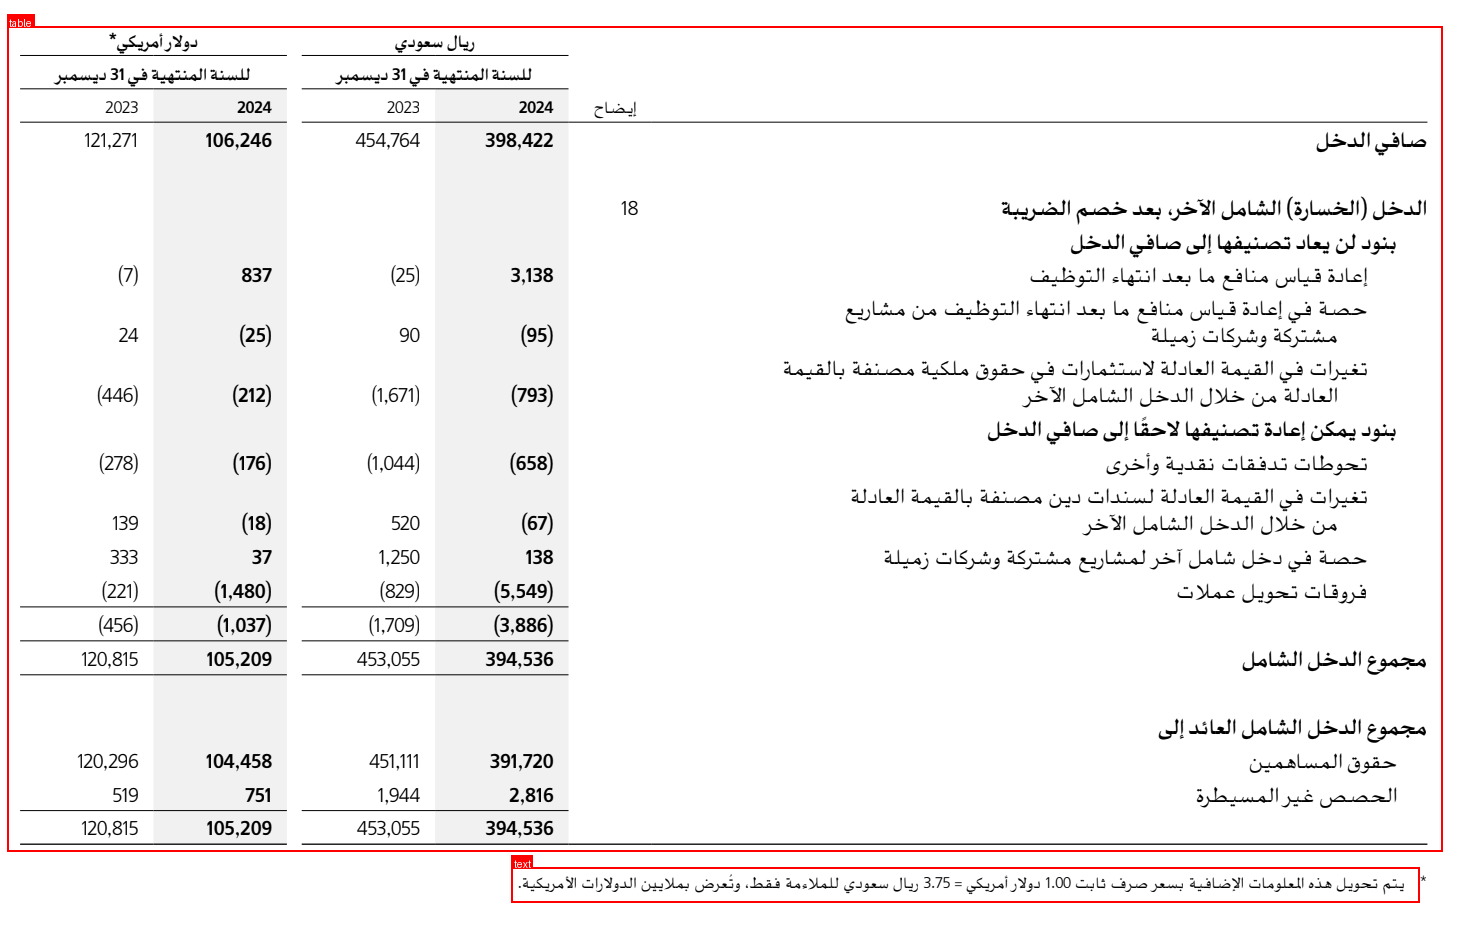

In [11]:
draw_bounding_boxes(image, boxes)

In [15]:
from PIL import ImageFont, ImageDraw

draw = ImageDraw.Draw(image)

# use a truetype font
font = ImageFont.truetype("Arial Unicode.ttf", 15)

draw.text((10, 25), "world", font=font)

In [ ]:
draw.s

TypeError: ImageDraw.bitmap() missing 2 required positional arguments: 'xy' and 'bitmap'

In [14]:
import os
from pathlib import Path

font_dirs = [
    "/Library/Fonts",
    "/System/Library/Fonts",
    str(Path.home() / "Library/Fonts"),
]

all_fonts = []

for d in font_dirs:
    if os.path.isdir(d):
        for root, dirs, files in os.walk(d):
            for file in files:
                if file.lower().endswith((".ttf", ".otf", ".ttc", ".dfont")):
                    all_fonts.append(os.path.join(root, file))

print("Fonts found in macOS font dirs:")
for font_path in all_fonts:
    print(font_path)


Fonts found in macOS font dirs:
/Library/Fonts/Arial Unicode.ttf
/System/Library/Fonts/AppleSDGothicNeo.ttc
/System/Library/Fonts/Menlo.ttc
/System/Library/Fonts/STHeiti Medium.ttc
/System/Library/Fonts/Symbol.ttf
/System/Library/Fonts/Geneva.ttf
/System/Library/Fonts/Hiragino Sans GB.ttc
/System/Library/Fonts/LastResort.otf
/System/Library/Fonts/NotoSerifMyanmar.ttc
/System/Library/Fonts/HelveticaNeue.ttc
/System/Library/Fonts/SFNSMono.ttf
/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc
/System/Library/Fonts/Noteworthy.ttc
/System/Library/Fonts/NotoSansOriya.ttc
/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc
/System/Library/Fonts/ThonburiUI.ttc
/System/Library/Fonts/SFGeorgian.ttf
/System/Library/Fonts/SFHebrew.ttf
/System/Library/Fonts/Optima.ttc
/System/Library/Fonts/ZapfDingbats.ttf
/System/Library/Fonts/SFArmenian.ttf
/System/Library/Fonts/Apple Braille.ttf
/System/Library/Fonts/ZitherIndia.otf
/System/Library/Fonts/Avenir Next Condensed.ttc
/System/Library/Fonts/LucidaGrande.ttc
/System/Libra